In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load, normalize, and resize
def load_transform(filepath, 
                   img_size=(4, 4), 
                   conv_to_theta=False,
                   flatten=False):
    
    """
    flatten (True/False) - flatten to a vector
    """

    img = Image.open(filepath)
    img = img.resize(img_size)
    img = np.array(img) / 255 # normalize
    
    if conv_to_theta:
        img = img * np.pi / 2 # convert to number between 0 and pi/2
    
    if flatten:
        img = img.flatten()
    
    return img

0.0 1.5707963267948966


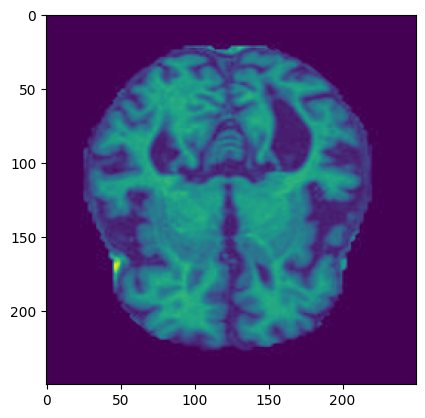

In [28]:
filepath = "data/train/MildDemented/mildDem0.jpg"
img = load_transform(filepath, 
                     img_size = (250, 250),
                     conv_to_theta=True,
                     flatten=False
                    )
print(img.min(), img.max())
plt.imshow(img)

In [33]:
filepath = "data/train/MildDemented/mildDem0.jpg"
img = load_transform(filepath, 
                     img_size = (250, 250),
                     conv_to_theta=True,
                     flatten=True
                    )
print(img[:100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
